---

## <code>Introduction:</code>
In the insurance industry, policy documents contain crucial information regarding coverage, claims, exclusions, and benefits. However, these documents are often lengthy and complex, making it difficult for users to extract specific information efficiently. **Mr.HelpMate AI** aims to solve this problem by building a generative search system that effectively retrieves and generates answers from an insurance policy document using **retrieval augmented generation (RAG)**.

This project will focus on developing a structured **three-layer AI pipeline**, which includes an **embedding layer**, a **search layer**, and a **generation layer**, ensuring accurate, context-aware responses to user queries.

---

## <code>Problem Statement:</code> 
Insurance policy documents contain vast amounts of information, and manually searching for relevant details is time-consuming and inefficient. Traditional keyword-based search systems often fail to provide contextually relevant answers. **Mr.HelpMate AI** aims to address these challenges by leveraging **AI-powered retrieval augmented generation** to create an intelligent, conversational search assistant capable of:
- Accurately extracting relevant policy details
- Understanding natural language queries
- Generating concise and contextually relevant answers

This project will implement and experiment with various strategies to optimize retrieval and generation quality, ultimately improving user experience in navigating policy documents.

---

## <code>Approach & Steps:</code> 
The project is structured into three key layers:

### 1. **_`Embedding Layer`_**
The embedding layer is responsible for processing, cleaning, and chunking the policy document into meaningful text segments. The goal is to store these chunks in a vector database for efficient retrieval.

#### **Steps:**
1. **Preprocess the PDF document**: Extract text, clean unnecessary formatting, and remove redundant data.
2. **Chunk the document**: Implement and experiment with different chunking strategies (fixed-length, semantic-based, etc.).
3. **Generate embeddings**: Use models like OpenAI's embedding model or **SentenceTransformers** from HuggingFace.
4. **Store embeddings in ChromaDB**: The vector database will be used for efficient semantic search.

### 2. **_`Search Layer`_**
The search layer enables efficient retrieval of relevant document chunks based on user queries.

#### **Steps:**
1. **Design 3 test queries**: Identify common user queries that can be answered using the document.
2. **Embed the queries**: Convert them into vector representations using the chosen embedding model.
3. **Retrieve relevant chunks**: Use similarity search in ChromaDB to fetch the most relevant document sections.
4. **Implement caching mechanism**: Optimize retrieval speed by caching frequently searched queries.
5. **Re-ranking block**: Improve accuracy using cross-encoding models from HuggingFace to refine the top retrieved results.

### 3. **_`Generation Layer`_**
The generation layer is responsible for generating final answers based on the retrieved document chunks using a language model.

#### **Steps:**
1. **Design an effective prompt**: Create a structured prompt that ensures high-quality, context-aware responses.
2. **Use a large language model (LLM)**: Experiment with different models like OpenAI's GPT or similar open-source models.
3. **Incorporate few-shot examples**: Improve accuracy by providing sample queries and expected answers.
4. **Generate final responses**: Combine retrieved information with LLM-generated outputs for precise answers.
5. **Evaluate responses**: Assess accuracy and relevancy using the three test queries.

---

## <code>Expected Deliverables:</code>
1. **Implementation of the three-layer RAG pipeline** (Embedding, Search, Generation).
2. **3 screenshots showcasing the top 3 retrieved chunks** for each test query (from the search layer).
3. **3 screenshots of the final AI-generated answers** for the same test queries (from the generation layer).
4. **Code, documentation, and comparative analysis** of different strategies used.

By following this structured approach, **Mr.HelpMate AI** will provide an efficient and intelligent solution for retrieving relevant information from insurance policy documents, significantly improving user experience and decision-making processes.

---

## <code>Pipelines that needs to be performed:</code>

`Major tasks to complete the assignment:`

1. Install and Import the Required Libraries

2. Read, Process PDF File

3. Document Chunking

4. Generating Embeddings

5. Store Embeddings in ChromaDB

6. Semantic Search with Cache

7. Re-Ranking with a Cross Encoder

8. Retrieval Augmented Generation

9. Queries

---

## <code>Install and Import the Required Libraries</code>📄

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install all the required libraries
!pip install -r "/content/drive/MyDrive/Colab Notebooks/requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.2 MB/s eta 0:00:00

In [3]:
# Importing necessary libraries
import pdfplumber  # Library to extract data from PDF files
import pandas as pd  # Library for data manipulation and analysis (DataFrames)
from operator import itemgetter  # Used for extracting specific items from iterable data
import json  # Library for working with JSON data
import openai  # OpenAI's Python library for interacting with GPT models

import warnings
warnings.filterwarnings("ignore")

---

## <code>Read, Process PDF File</code>📄

To work with PDF files and extract relevant data like text, tables, and other document elements, we'll use the **pdfplumber** library. This library provides powerful functionality for parsing and extracting data from PDF files, offering several key benefits:

- **Text Extraction:** Pdfplumber allows for the extraction of plain text from a PDF, including handling different layouts and encoding.
- **Table Extraction:** It has built-in support for extracting tabular data from PDFs, which can be useful when you need to capture structured data from documents.
- **Advanced Parsing:** Pdfplumber also supports parsing images and other document elements, and it comes with visual debugging features to help identify how the document is structured.
  
#### ___`Installing pdfplumber`___

You can install `pdfplumber` via pip:

```bash
!pip install pdfplumber
```

#### ___`Example Workflow for Reading and Processing PDFs:`___

Here’s an example of how you can use pdfplumber to read a PDF file, extract text, and also pull out tables from it.

```python
import pdfplumber

# Open the PDF file with pdfplumber
with pdfplumber.open("path_to_pdf_file.pdf") as pdf:
    # Loop through all the pages in the PDF
    for page in pdf.pages:
        # Extract plain text from the page
        text = page.extract_text()
        print("Extracted Text:")
        print(text)
        
        # Extract tables from the page
        tables = page.extract_tables()
        print("Extracted Tables:")
        for table in tables:
            for row in table:
                print(row)
```

#### ___`Key Features:`___

- **Extracting Text:**
  - The `extract_text()` method allows for extracting all the text from a specific page.
  - If you need to extract text from the entire document, you can loop through all pages.
  
- **Extracting Tables:**
  - The `extract_tables()` method helps extract tabular data.
  - It returns a list of tables, where each table is represented as a list of rows, and each row is a list of cells.
  
- **Handling Complex PDFs:**
  - Pdfplumber allows for more complex processing, like handling OCR (optical character recognition) for images and non-readable content, which can be valuable in PDFs that contain scanned pages or non-selectable text.
  
- **Visual Debugging:**
  - Pdfplumber has useful debugging tools to visualize how the PDF is parsed, making it easier to understand the layout and structure of complex documents.

#### ___`Why pdfplumber?`___

- **Precision:** It ensures the preservation of layout and tables, unlike other libraries like PyPDF2, which focus mainly on text extraction.
- **Advanced Extraction:** pdfplumber can handle PDFs with a mix of text, tables, and images, providing a comprehensive solution.
- **Debugging:** The visual debugging tools make it easy to adjust parsing techniques when working with more complicated PDFs.

In summary, pdfplumber is a highly efficient tool for reading and extracting data from PDF files, especially when dealing with documents that include structured elements like tables and non-text content. Whether you're parsing plain text or dealing with more complex layouts, pdfplumber is a versatile and powerful solution.

In [4]:
# Define PDF path
pdf_path = "/content/drive/MyDrive/Colab Notebooks/Principal-Sample-Life-Insurance-Policy.pdf"

### <code>Reading a single PDF file and exploring it through pdfplumber</code> 

In [5]:
# Open the PDF file and print the text
with pdfplumber.open(pdf_path) as pdf:  # Using pdfplumber to open the PDF file from the given path

    # Get one of the pages from the PDF and examine it
    single_page = pdf.pages[6]  # Accessing the 7th page (index 6) of the PDF

    # Extract text from the first page
    text = single_page.extract_text()  # Extracting all the readable text from the specified page

    # Extract tables from the first page
    tables = single_page.extract_tables()  # Extracting any tables present on the specified page

    # Print the extracted text
    print(text)  # Output the extracted text to the console

Section A – Eligibility
Member Life Insurance Article 1
Member Accidental Death and Dismemberment Insurance Article 2
Dependent Life Insurance Article 3
Section B - Effective Dates
Member Life Insurance Article 1
Member Accidental Death and Dismemberment Insurance Article 2
Dependent Life Insurance Article 3
Section C - Individual Terminations
Member Life Insurance Article 1
Member Accidental Death and Dismemberment Insurance Article 2
Dependent Life Insurance Article 3
Termination for Fraud Article 4
Coverage While Outside of the United States Article 5
Section D - Continuation
Member Life Insurance Article 1
Dependent Insurance - Developmentally Disabled or
Physically Handicapped Children Article 2
Section E - Reinstatement
Reinstatement Article 1
Federal Required Family and Medical Leave Act (FMLA) Article 2
Reinstatement of Coverage for a Member or Dependent When
Coverage Ends due to Living Outside of the United States Article 3
Section F - Individual Purchase Rights
Member Life In

In [6]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables
def check_bboxes(word, table_bbox):
    # Check whether word is inside a table bounding box (bbox)
    l = word['x0'], word['top'], word['x1'], word['bottom']  # Extract the coordinates (left, top, right, bottom) of the word
    r = table_bbox  # The bounding box coordinates of the table

    # Return True if the word's bounding box is entirely within the table's bounding box, otherwise False
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [7]:
# Function to extract text from a PDF file.
# 1. Declare a variable 'p' to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the extracted text files for all pages
# 3. Use pdfplumber to open the pdf pages one by one and extract the text and tables
# 4. Find the tables and their locations in the page by identifying the bounding box coordinates of each table
# 5. Extract the content from the tables and store them in the variable 'tables'
# 6. Extract the regular words (non-table words) by calling the function 'check_bboxes()' to check whether the words are inside any table or not
# 7. Use the 'cluster_objects' utility to group non-table words and table elements together based on their vertical alignment,
#    ensuring the correct chronology and flow of the content as it appears in the PDF.
# 8. Declare an empty list 'lines' to store the actual text content from the page (including both regular text and table data)
# 9. If a text element is present in the cluster, append it to the 'lines' list; if a table element is present, append the table content as a JSON object
# 10. Append the page number and the corresponding text (or table) to 'full_text', and increment 'p' to move to the next page
# 11. Once the function has iterated through all pages in the PDF, return the 'full_text' list containing text and table data

def extract_text_from_pdf(pdf_path):
    p = 0  # Initialize page counter
    full_text = []  # List to store extracted text from all pages


    with pdfplumber.open(pdf_path) as pdf:  # Open the PDF with pdfplumber
        for page in pdf.pages:  # Iterate through each page in the PDF
            page_no = f"Page {p+1}"  # Define page number
            text = page.extract_text()  # Extract text from the page

            # Extract tables and their bounding boxes
            tables = page.find_tables()  # Find all tables on the page
            table_bboxes = [i.bbox for i in tables]  # Get the bounding boxes of each table
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]  # Extract tables with their positions
            # Extract non-table words
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]  # Filter words that are not in tables

            lines = []  # List to store text elements (non-table text and table data)

            # Cluster text and table objects together based on their position
            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):
                if 'text' in cluster[0]:  # Check if the cluster contains text
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))  # Join words in the cluster and add to lines
                    except KeyError:
                        pass  # Ignore errors if 'text' is not in the cluster

                elif 'table' in cluster[0]:  # Check if the cluster contains a table
                    lines.append(json.dumps(cluster[0]['table']))  # Add table data as a JSON string

            full_text.append([page_no, " ".join(lines)])  # Append the page number and all lines of text to full_text
            p += 1  # Increment the page counter

    return full_text  # Return the final list of extracted text with page numbers

* Now that we have defined the function for extracting the text

In [ ]:
# Initialize an empty list to store the extracted texts and document names
data = []  # List to hold the data frames of extracted text from each PDF

# Process the PDF file
print(f"...Processing {pdf_path}")  # Print a message indicating the start of PDF processing

# Call the function to extract the text from the PDF
extracted_text = extract_text_from_pdf(pdf_path)  # Extract text from the PDF using the earlier defined function

# Convert the extracted list to a DataFrame, and add a column to store document names
extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page_Text'])  # Convert the extracted text into a DataFrame

# Append the extracted text and document name to the list
data.append(extracted_text_df)  # Append the DataFrame to the data list

# Print a message to indicate progress
print(f"Finished processing {pdf_path}")  # Print message after PDF processing is complete

# Print a message to indicate all PDFs have been processed
print("PDFs have been processed.")  # Indicate that all PDFs have been processed

In [9]:
# print the text
data

[   Page No.                                          Page_Text
 0    Page 1  DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...
 1    Page 2                 This page left blank intentionally
 2    Page 3  POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...
 3    Page 4                 This page left blank intentionally
 4    Page 5  PRINCIPAL LIFE INSURANCE COMPANY (called The P...
 ..      ...                                                ...
 59  Page 60  I f a Dependent who was insured dies during th...
 60  Page 61  Section D - Claim Procedures Article 1 - Notic...
 61  Page 62  A claimant may request an appeal of a claim de...
 62  Page 63                 This page left blank intentionally
 63  Page 64  Principal Life Insurance Company Des Moines, I...
 
 [64 rows x 2 columns]]

In [10]:
# Concatenate the list of DataFrames into a single DataFrame
insurance_pdfs_data = pd.concat(data, ignore_index=True)  # Combine all DataFrames in the 'data' list into a single DataFrame

insurance_pdfs_data  # Display the final concatenated DataFrame containing the extracted text from all PDFs

,Page No.,Page_Text
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...
1,Page 2,This page left blank intentionally
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...
3,Page 4,This page left blank intentionally
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...
...,...,...
59,Page 60,I f a Dependent who was insured dies during th...
60,Page 61,Section D - Claim Procedures Article 1 - Notic...
61,Page 62,A claimant may request an appeal of a claim de...
62,Page 63,This page left blank intentionally


In [11]:
# Add a new 'Metadata' column to the DataFrame by applying a lambda function to each row
insurance_pdfs_data['Metadata'] = insurance_pdfs_data.apply(lambda x: {'Page_No.': x['Page No.']}, axis=1)
# The lambda function creates a dictionary with the page number as metadata for each row

insurance_pdfs_data  # Display the DataFrame with the new 'Metadata' column

,Page No.,Page_Text,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,{'Page_No.': 'Page 1'}
1,Page 2,This page left blank intentionally,{'Page_No.': 'Page 2'}
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,{'Page_No.': 'Page 3'}
3,Page 4,This page left blank intentionally,{'Page_No.': 'Page 4'}
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,{'Page_No.': 'Page 5'}
...,...,...,...
59,Page 60,I f a Dependent who was insured dies during th...,{'Page_No.': 'Page 60'}
60,Page 61,Section D - Claim Procedures Article 1 - Notic...,{'Page_No.': 'Page 61'}
61,Page 62,A claimant may request an appeal of a claim de...,{'Page_No.': 'Page 62'}
62,Page 63,This page left blank intentionally,{'Page_No.': 'Page 63'}


In [12]:
# Check one of the extracted page texts to ensure that the text has been correctly read
insurance_pdfs_data.Page_Text[2]

'POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Principal a Financial Services Hotline and Grief Support Services or any other value added service for the employees of that employer group. In addition, The Principal may arrange for third party service providers (i.e., optometrists, health clubs), to provide discounted goods and services to those employer groups who apply for coverage with The Principal or who become insureds/enrollees of The Principal. While The Principal has arranged these goods, services and/or third party provider discounts, the third party service providers are liable to the applicants/insureds/enrollees for the provision of such goods and/or services. The Principal is not responsible for the

In [13]:
# Let's also check the length of all the texts as there might be some empty pages or pages with very few words that we can drop
insurance_pdfs_data['Text_Length'] = insurance_pdfs_data['Page_Text'].apply(lambda x: len(x.split(' ')))

In [14]:
# print the page length
insurance_pdfs_data['Text_Length']

,Text_Length
0,30
1,5
2,230
3,5
4,110
...,...
59,285
60,418
61,322
62,5


In [15]:
# print the dataframe
insurance_pdfs_data

,Page No.,Page_Text,Metadata,Text_Length
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,{'Page_No.': 'Page 1'},30
1,Page 2,This page left blank intentionally,{'Page_No.': 'Page 2'},5
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,{'Page_No.': 'Page 3'},230
3,Page 4,This page left blank intentionally,{'Page_No.': 'Page 4'},5
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,{'Page_No.': 'Page 5'},110
...,...,...,...,...
59,Page 60,I f a Dependent who was insured dies during th...,{'Page_No.': 'Page 60'},285
60,Page 61,Section D - Claim Procedures Article 1 - Notic...,{'Page_No.': 'Page 61'},418
61,Page 62,A claimant may request an appeal of a claim de...,{'Page_No.': 'Page 62'},322
62,Page 63,This page left blank intentionally,{'Page_No.': 'Page 63'},5


---

To implement document chunking and generate embeddings, we need to break down the text into smaller, more manageable pieces (chunks). This is particularly useful when dealing with large documents, as embeddings are typically generated for smaller units of text (chunks) rather than for the entire document at once.

## <code>Document Chunking</code>📄

The most straightforward approach for chunking is to split the document's text into fixed-size chunks. Each chunk will contain a specific number of characters or words. Once the text is chunked, we can generate embeddings for each chunk and then use these embeddings for semantic search.

#### ___`Steps:`___
1. **Extract Text from PDF**: We first extract the text from the document using libraries like `pdfplumber`.
2. **Chunk the Text**: Split the text into smaller parts (chunks), each with a predefined size (e.g., 500 characters or a set number of words).
3. **Generate Embeddings**: Once the text is chunked, generate embeddings for each chunk using a model like `SentenceTransformer`.
4. **Use Embeddings for Semantic Search**: These embeddings can now be used for semantic search to find relevant chunks based on a user's query.

#### ___`Chunking a single document by fixed size`___
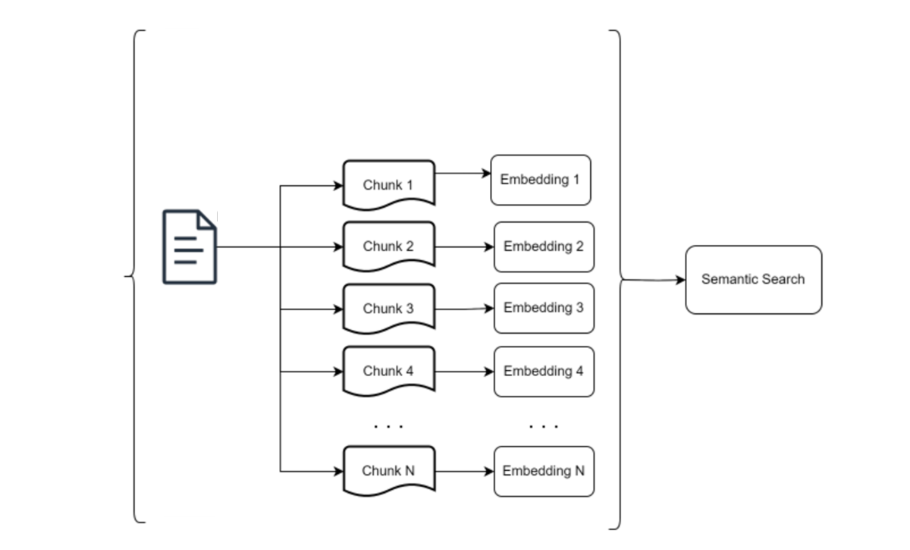

#### ___`Basic Chunking Code`___

Here is a basic implementation to chunk the text:

```python
# Function to chunk the text into fixed-size pieces
def chunk_text(text, chunk_size=500):
    chunks = []
    words = text.split()  # Split the text into words

    current_chunk = []  # Current chunk of words
    current_chunk_size = 0  # Size of the current chunk

    for word in words:
        if current_chunk_size + len(word) + 1 <= chunk_size:
            current_chunk.append(word)
            current_chunk_size += len(word) + 1  # Including space
        else:
            chunks.append(' '.join(current_chunk))  # Add the chunk to the list
            current_chunk = [word]  # Start a new chunk with the current word
            current_chunk_size = len(word)  # Reset size for the new chunk

    # Add any remaining words as the last chunk
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks
```

This function will split a large text into smaller chunks of a specified size (`chunk_size`).

#### ___`Next Steps:`___
1. **Load the PDF and Extract Text**: Extract the text from your document.
2. **Chunk the Text**: Use the `chunk_text` function to split the extracted text.
3. **Generate Embeddings**: Use a model like `SentenceTransformer` to create embeddings for each chunk.
4. **Perform Semantic Search**: Use the embeddings to perform a semantic search based on a user's query.

In [16]:
# Check the entire page's text
insurance_pdfs_data['Page_Text']

,Page_Text
0,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...
1,This page left blank intentionally
2,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...
3,This page left blank intentionally
4,PRINCIPAL LIFE INSURANCE COMPANY (called The P...
...,...
59,I f a Dependent who was insured dies during th...
60,Section D - Claim Procedures Article 1 - Notic...
61,A claimant may request an appeal of a claim de...
62,This page left blank intentionally


In [17]:
# Iterating over all page titles to create the final df with individual chunks
page_nos = insurance_pdfs_data["Page No."]
page_nos

,Page No.
0,Page 1
1,Page 2
2,Page 3
3,Page 4
4,Page 5
...,...
59,Page 60
60,Page 61
61,Page 62
62,Page 63


### <code>Fixed-Size Chunking</code>

In **fixed-size chunking**, we split a document into smaller, manageable chunks, where each chunk has a fixed size, either in terms of characters or words. This technique is particularly useful when dealing with large documents that need to be processed in smaller pieces to generate embeddings, perform semantic search, or further analyze.

Here’s how **fixed-size chunking** works:
- **Fixed Size**: You define the size of each chunk. This can be based on character count (e.g., 500 characters) or word count (e.g., 100 words).
- **Sliding Window**: The text is divided into windows of the defined size. This means that each chunk will have a fixed number of characters or words, and the next chunk will start immediately after the previous one, without any overlap (unless specified).
  
#### ___`Advantages of Fixed-Size Chunking`___
- **Simplicity**: This is a straightforward technique where the document is just split into pieces of equal size.
- **Efficient**: It’s computationally efficient, especially when dealing with large documents.
- **Memory Management**: Small chunks are easier to process in memory.

#### ___`Example: Fixed-Size Chunking`___

Let’s go through an example of splitting text into fixed-size chunks, where each chunk contains 500 characters:

```python
# Function to chunk text into fixed-size chunks of specified size
def chunk_text_fixed_size(text, chunk_size=500):
    chunks = []
    # Loop through the text and slice it into chunks of fixed size
    for i in range(0, len(text), chunk_size):
        chunks.append(text[i:i + chunk_size])
    return chunks

# Example text from a PDF or document
text = "This is an example of a large document that we will split into smaller chunks of fixed size. " \
       "Each chunk will have a specified number of characters, making it easier to process."

# Split the text into chunks of 100 characters each
chunk_size = 100
chunks = chunk_text_fixed_size(text, chunk_size)

# Display the chunks
for idx, chunk in enumerate(chunks):
    print(f"Chunk {idx+1}: {chunk}\n")
```

#### ___`Process Flow for Fixed-Size Chunking:`___

1. **Extract Text**:
   - First, extract the text from the document (such as from a PDF).
   
2. **Chunk the Text**:
   - Split the text into fixed-size chunks using the `chunk_text_fixed_size()` function.
   
3. **Generate Embeddings**:
   - Use an embedding model like `SentenceTransformer` to generate embeddings for each chunk.
   
4. **Semantic Search**:
   - Use these embeddings for performing semantic search on the document. A user's query can be matched to the relevant chunk based on its embedding.

#### ___`Why Fixed-Size Chunking?`___

- **Easy to Implement**: Fixed-size chunking is simple to implement and understand. You don’t need complex algorithms to break the text into chunks.
- **No Overlap**: This method doesn’t overlap chunks, making it faster and more efficient for processing large documents.
- **Useful for Simple Models**: Works well for basic semantic search tasks where you don’t need overlapping or context-aware chunking.

#### ___`Example Workflow with Embeddings`___

1. **Extract Text from PDF**: Use `pdfplumber` to extract text from the document.
2. **Chunk Text**: Break the extracted text into fixed-size chunks.
3. **Generate Embeddings**: Generate embeddings for each chunk using a model like `SentenceTransformer`.
4. **Perform Search**: Use these embeddings for semantic search when a user queries the document.

In [18]:
# Function to split text into fixed-size chunks
def split_text_into_chunks(text, chunk_size):
    chunks = []  # List to hold the text chunks
    words = text.split()  # Split the input text into individual words

    current_chunk = []  # List to store words for the current chunk
    current_chunk_word_count = 0  # Initialize the word count for the current chunk

    for word in words:  # Iterate over each word in the split text
        # If adding the word doesn't exceed the chunk size
        if current_chunk_word_count + len(word) + 1 <= chunk_size:
            current_chunk.append(word)  # Add the word to the current chunk
            current_chunk_word_count += len(word) + 1  # Update word count (including space)
        else:
            chunks.append(' '.join(current_chunk))  # If the chunk is full, add it to the list of chunks
            current_chunk = [word]  # Start a new chunk with the current word
            current_chunk_word_count = len(word)  # Reset the word count for the new chunk

    if current_chunk:  # If there are any remaining words in the current chunk
        chunks.append(' '.join(current_chunk))  # Add the last chunk to the list

    return chunks  # Return the list of chunks


In [19]:
# Function to process a specific page and split its text into chunks, storing page metadata
def process_page(page_no):
    """
    Processes a specific page by extracting the text associated with it, splitting the text into fixed-size chunks,
    and storing the page's metadata along with the chunked text. The resulting DataFrame contains the page number,
    chunked text, and corresponding metadata.

    Parameters:
    page_no (int): The page number to be processed from the `insurance_pdfs_data` DataFrame.

    Returns:
    pd.DataFrame: A DataFrame containing the page number, chunked text, and metadata (including chunk number).
    """
    # Extracting the text and metadata for the specified page number from the 'insurance_pdfs_data' DataFrame
    page = insurance_pdfs_data[insurance_pdfs_data['Page No.'] == page_no].Page_Text.values[0]
    metadata = insurance_pdfs_data[insurance_pdfs_data['Page No.'] == page_no].Metadata.values[0]

    if page is not None:
        # Setting chunk size as 500 characters per chunk
        chunk_size = 500
        text_chunks = split_text_into_chunks(page, chunk_size)  # Splitting the page text into chunks

        # Creating a DataFrame to store the chunks, page title (page number), and page metadata
        data = {'Title': [], 'Chunk Text': [], 'Metadata': []}

        # Iterating through the text chunks and populating the DataFrame with corresponding data
        for index, chunk in enumerate(text_chunks):
            data['Title'].append(page_no)  # Adding the page number to the 'Title' column
            data['Chunk Text'].append(chunk)  # Adding the chunked text to the 'Chunk Text' column
            # Adding chunk number as part of the metadata for each chunk
            metadata['Chunk_No.'] = index
            data['Metadata'].append(metadata)  # Adding metadata (with chunk number) to the 'Metadata' column

        # Returning the DataFrame containing the chunked text, page number, and metadata
        return pd.DataFrame(data)

In [20]:
# Creating a dataframe after calling the 'process_page' function for each page
all_dfs = []  # List to store DataFrames for each page

# Iterate over the list of page numbers (page_nos)
for page_no in page_nos:
    df = process_page(page_no)  # Process the page and get the resulting DataFrame
    if df is not None:  # Check if the DataFrame is not empty
        all_dfs.append(df)  # Append the DataFrame to the list if it's valid

# Concatenate all the DataFrames in the 'all_dfs' list into a single DataFrame
fixed_chunk_df = pd.concat(all_dfs, ignore_index=True)  # Reset the index after concatenation

fixed_chunk_df  # Display the resulting concatenated DataFrame containing chunked text and metadata

,Title,Chunk Text,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}"
1,Page 2,This page left blank intentionally,"{'Page_No.': 'Page 2', 'Chunk_No.': 0}"
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 2}"
3,Page 3,arrange for third party service providers (i.e...,"{'Page_No.': 'Page 3', 'Chunk_No.': 2}"
4,Page 3,the provision of such goods and/or services no...,"{'Page_No.': 'Page 3', 'Chunk_No.': 2}"
...,...,...,...
226,Page 62,"requested additional information, The Principa...","{'Page_No.': 'Page 62', 'Chunk_No.': 3}"
227,Page 62,may have the Member or Dependent whose loss is...,"{'Page_No.': 'Page 62', 'Chunk_No.': 3}"
228,Page 62,proof of loss has been filed and before the ap...,"{'Page_No.': 'Page 62', 'Chunk_No.': 3}"
229,Page 63,This page left blank intentionally,"{'Page_No.': 'Page 63', 'Chunk_No.': 0}"


---

## <code>Generating Embeddings</code>📄

In the context of semantic search, **embeddings** are vector representations of the text that capture its semantic meaning. By converting documents or chunks of text into embeddings, we can compare them effectively using mathematical operations like cosine similarity to identify relevant documents based on a user query.

#### _**`Encoding Pipeline`**_

The **Encoding Pipeline** follows a structured process for transforming raw documents (or text) into embeddings. Here’s a step-by-step overview:

1. **Documents**: These are the raw textual data you want to work with. This could be anything from articles, research papers, insurance policies, or any text-based content.
   
2. **Text Embedder**: This step uses a pre-trained model (like `SentenceTransformer` or other deep learning-based models) to convert the raw text into embeddings. The text embedder is a neural network model that encodes each document or chunk of text into a dense vector space, where semantically similar texts are closer together in the vector space.

3. **Store Embeddings**: After embedding the documents, these vectors are stored in a database or vector store. The embeddings are used for subsequent tasks, such as similarity searches and ranking. By storing the embeddings, we can efficiently retrieve and compare them later when processing user queries.

---

#### ___`Steps for Generating Embeddings`___

##### **1. Extract Text**
The first step is to extract text from your documents, whether they are in PDFs, Word files, or plain text. This can be done using libraries like **pdfplumber** for PDFs or other parsers for different file types.

##### **2. Chunk the Text**
As mentioned earlier, documents are usually chunked into smaller pieces (like paragraphs or fixed-size chunks) to make them easier to process and generate embeddings.

##### **3. Generate Embeddings**
Use a model like **SentenceTransformer** to generate the embeddings for each chunk of text. These embeddings are the vectorized representations that capture the semantic meaning of the text.

```python
from sentence_transformers import SentenceTransformer

# Initialize the model
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Example: List of document chunks
chunks = ["This is the first document.", "This is the second document.", "This is the third document."]

# Generate embeddings for each chunk
embeddings = embedder.encode(chunks)

print(embeddings)  # This will print the embeddings for each chunk
```

##### **4. Store the Embeddings**
Once the embeddings are generated, they are stored in a database or vector store like **ChromaDB**, **FAISS**, or **Pinecone** for efficient similarity searches.

#### ___`Example Workflow`___

1. **Extract text** from a PDF document using **pdfplumber** or another text extraction library.
2. **Chunk the extracted text** into fixed-size chunks or semantic chunks.
3. **Generate embeddings** for each chunk using a pre-trained model like **SentenceTransformer**.
4. **Store embeddings** in a vector store to make them searchable.
5. **Semantic search**: When a user query is received, generate an embedding for the query and compare it with the stored embeddings to retrieve the most relevant documents.

In [21]:
# Import the SentenceTransformer library for generating sentence embeddings
from sentence_transformers import SentenceTransformer  # Provides pre-trained models for embedding sentences

In [22]:
# Define the model name for sentence embeddings
model_name = "all-MiniLM-L6-v2"  # Pre-trained model for generating sentence embeddings

# Load the SentenceTransformer model
embedder = SentenceTransformer(model_name)  # Initialize the embedder using the specified model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [23]:
# Function to generate embeddings for a list of texts
def generate_embeddings(texts):
    """
    Generates embeddings for the provided texts using the SentenceTransformer model.

    Parameters:
    texts (list): A list of text strings for which embeddings need to be generated.

    Returns:
    list: A list of generated embeddings corresponding to the input texts.
    """
    # Generate embeddings for the input texts using the embedder
    embeddings = embedder.encode(texts, convert_to_tensor=False)  # Convert the texts to embeddings without using tensors
    return embeddings  # Return the generated embeddings

In [24]:
# Function to generate embeddings for the 'Chunk Text' column in the DataFrame
def generate_embeddings_on_df(df):
    """
    Adds a new column 'Embeddings' to the DataFrame by generating embeddings for the 'Chunk Text' column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing a 'Chunk Text' column with text data.

    Modifies:
    The DataFrame by adding a new 'Embeddings' column containing the generated embeddings for each chunk of text.
    """
    # Apply the generate_embeddings function to each 'Chunk Text' in the DataFrame and store the resulting embeddings
    df['Embeddings'] = df['Chunk Text'].apply(lambda x: generate_embeddings([x])[0])  # Generate and assign embeddings

In [25]:
# Generate embeddings for the 'Chunk Text' column in the fixed_chunk_df DataFrame
generate_embeddings_on_df(fixed_chunk_df)  # This will add a new 'Embeddings' column to the DataFrame

In [26]:
# print the dataframe
fixed_chunk_df

,Title,Chunk Text,Metadata,Embeddings
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}","[-0.025921896, 0.04777749, 0.05585775, 0.04239..."
1,Page 2,This page left blank intentionally,"{'Page_No.': 'Page 2', 'Chunk_No.': 0}","[0.029118983, 0.060574077, 0.046415307, 0.0377..."
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 2}","[-0.064537935, 0.04319714, -8.393195e-05, -0.0..."
3,Page 3,arrange for third party service providers (i.e...,"{'Page_No.': 'Page 3', 'Chunk_No.': 2}","[-0.10200988, -0.028467715, -0.020565106, -0.0..."
4,Page 3,the provision of such goods and/or services no...,"{'Page_No.': 'Page 3', 'Chunk_No.': 2}","[-0.09000834, 0.07658209, 0.0049276194, -0.083..."
...,...,...,...,...
226,Page 62,"requested additional information, The Principa...","{'Page_No.': 'Page 62', 'Chunk_No.': 3}","[-0.047671963, 0.112777, 0.069064915, -0.05086..."
227,Page 62,may have the Member or Dependent whose loss is...,"{'Page_No.': 'Page 62', 'Chunk_No.': 3}","[-0.079419985, 0.14404446, 0.03187614, -0.0655..."
228,Page 62,proof of loss has been filed and before the ap...,"{'Page_No.': 'Page 62', 'Chunk_No.': 3}","[-0.14206009, 0.12368372, 0.12092471, -0.01142..."
229,Page 63,This page left blank intentionally,"{'Page_No.': 'Page 63', 'Chunk_No.': 0}","[0.029118983, 0.060574077, 0.046415307, 0.0377..."


---

## <code>Store Embeddings in ChromaDB</code>📄 

`In this section we will store embedding in ChromaDB collection.`

In [27]:
# Define the path where ChromaDB data will be stored
chroma_data_path = '/content/drive/MyDrive/Colab Notebooks/ChromaDB_Data'  # Directory to save ChromaDB data

In [28]:
# Import the chromadb library to interact with ChromaDB
import chromadb

# Call PersistentClient() to initialize the client with a persistent database at the specified path
client = chromadb.PersistentClient(path=chroma_data_path)  # Client will use the 'ChromaDB_Data' directory for storage

In [29]:
# Get or create a collection in ChromaDB with the specified name
collection = client.get_or_create_collection(name="insurance-collection")  # Creates or retrieves the 'insurance-collection' from ChromaDB

In [ ]:
# Add embeddings, documents, metadata, and ids to the ChromaDB collection
collection.add(
    embeddings = fixed_chunk_df['Embeddings'].to_list(),  # Convert the embeddings from the DataFrame into a list
    documents = fixed_chunk_df['Chunk Text'].to_list(),  # Convert the chunked text into a list
    metadatas = fixed_chunk_df['Metadata'].to_list(),  # Convert the metadata into a list
    ids = [str(i) for i in range(0, len(fixed_chunk_df['Embeddings']))]  # Generate unique string ids for each entry
)

In [31]:
# Retrieve specific entries from the ChromaDB collection based on their ids
collection.get(
    ids = ['0', '1', '2'],  # List of ids to fetch from the collection
    include = ['embeddings', 'documents', 'metadatas']  # Specify which fields to include in the response (embeddings, documents, and metadata)
)

{'ids': ['0', '1', '2'],
 'embeddings': array([[-2.59218961e-02,  4.77774888e-02,  5.58577515e-02, ...,
         -4.93266471e-02, -5.85114881e-02,  2.35520359e-02],
        [ 2.91189831e-02,  6.05740771e-02,  4.64153066e-02, ...,
          5.95400855e-02, -2.83837188e-02,  5.31934528e-03],
        [-6.45379350e-02,  4.31971401e-02, -8.39319473e-05, ...,
         -3.78734246e-02,  1.79674625e-02, -7.36598903e-03]]),
 'documents': ['DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/01/2014 711 HIGH STREET GEORGE RI 02903 GROUP POLICY FOR: RHODE ISLAND JOHN DOE ALL MEMBERS Group Member Life Insurance Print Date: 07/16/2014',
  'This page left blank intentionally',
  'POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Princi

In [32]:
# Get or create a cache collection in ChromaDB with the specified name
cache_collection = client.get_or_create_collection(name='insurance-collection-cache')  # Creates or retrieves 'insurance-collection-cache' collection

In [33]:
# Peek a few elements from the cache collection to view a sample of the stored data
cache_collection.peek()  # Retrieve and display a few entries from the 'insurance-collection-cache' collection

{'ids': ['what is the life insurance coverage for disability',
  'what is the Proof of ADL Disability or Total Disability',
  'what is condition of death while not wearing Seat Belt'],
 'embeddings': array([[-0.07620075,  0.10754956, -0.04078717, ..., -0.02822857,
          0.08649307,  0.08005349],
        [-0.1126289 ,  0.05175915, -0.00465672, ...,  0.10451437,
          0.02804654,  0.03974168],
        [ 0.02813486,  0.08606376, -0.0408508 , ..., -0.03272641,
         -0.04479828,  0.01157418]]),
 'documents': ['what is the life insurance coverage for disability',
  'what is the Proof of ADL Disability or Total Disability',
  'what is condition of death while not wearing Seat Belt'],
 'uris': None,
 'data': None,
 'metadatas': [{'distances0': '0.7124122381210327',
   'distances1': '0.8027516603469849',
   'distances2': '0.8602006435394287',
   'distances3': '0.8729649782180786',
   'distances4': '0.8979802131652832',
   'distances5': '0.9084635972976685',
   'distances6': '0.91023

---

## <code>Semantic Search with Cache</code>📄 

`In this section, we'll perform a semantic search of a query in the collections embeddings to get several top semantically similar results.`

In [34]:
# Read the user query
query = input()

what is the life insurance coverage for disability


In [35]:
# Query the cache collection for similar entries based on the provided query text
cache_results = cache_collection.query(
    query_texts=query,  # Query text(s) to search for similar entries in the collection
    n_results=1  # Number of similar results to retrieve (1 result in this case)
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [04:53<00:00, 283kiB/s]


In [36]:
# get result from cache collection
cache_results

{'ids': [['what is the life insurance coverage for disability']],
 'embeddings': None,
 'documents': [['what is the life insurance coverage for disability']],
 'uris': None,
 'data': None,
 'metadatas': [[{'distances0': '0.7124122381210327',
    'distances1': '0.8027516603469849',
    'distances2': '0.8602006435394287',
    'distances3': '0.8729649782180786',
    'distances4': '0.8979802131652832',
    'distances5': '0.9084635972976685',
    'distances6': '0.9102334976196289',
    'distances7': '0.9125921726226807',
    'documents0': 'Member Life Insurance or Coverage During Disability terminates under this Group Policy. This policy has been updated effective January 1, 2014 PART III - INDIVIDUAL REQUIREMENTS AND RIGHTS GC 6011 Section F - Individual Purchase Rights, Page 1',
    'documents1': "Payment of benefits will be subject to the Beneficiary and Facility of Payment provisions of this PART IV, Section A. Article 6 - Member Life Insurance - Coverage During Disability A Member may 

In [37]:
# Query the main collection for similar entries based on the provided query text
results = collection.query(
    query_texts=query,  # Query text(s) to search for similar entries in the collection
    n_results=10  # Number of similar results to retrieve (10 results in this case)
)

# Print the size of the query results
print("Result size is : " + str(len(results.items())))  # Print the number of returned items

# Display the retrieved items from the results
results.items()  # Show the list of retrieved items (documents, embeddings, etc.)

Result size is : 8


dict_items([('ids', [['143', '171', '147', '151', '183', '146', '180', '85', '179', '142']]), ('embeddings', None), ('documents', [['Member Life Insurance or Coverage During Disability terminates under this Group Policy. This policy has been updated effective January 1, 2014 PART III - INDIVIDUAL REQUIREMENTS AND RIGHTS GC 6011 Section F - Individual Purchase Rights, Page 1', "Payment of benefits will be subject to the Beneficiary and Facility of Payment provisions of this PART IV, Section A. Article 6 - Member Life Insurance - Coverage During Disability A Member may be eligible to continue his or her Member Life and Member Accidental Death and Dismemberment Insurance and Dependent Life Insurance coverage during the Member's ADL Disability or Total Disability. a. Coverage Qualification To be qualified for Coverage During Disability, a Member must: (1) become ADL", 'any Accelerated Benefit payment as described in PART IV, Section A, Article 7. Article 2 - Dependent Life Insurance a. Ind

In [38]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2  # Distance threshold to decide whether to use the cache or query the main collection

# Initialize lists to store results
ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()  # DataFrame to store the results

# Check if the cache results' distance are empty or greater than the threshold
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # If the distance is above the threshold, query the collection to fetch top 10 results
    results = collection.query(
        query_texts=query,  # The query text to search for similar entries in the collection
        n_results=10  # Number of similar results to retrieve
    )

    # Store the query in the cache collection so that it can be searched against later
    # Store retrieved text, ids, distances, and metadatas in the cache for future queries
    Keys = []
    Values = []

    size = len(results.items())  # Get the number of items in the result

    # Process the results and add to the cache
    for key, val in results.items():
        if val is None:
            continue
        for i in range(size):
            Keys.append(str(key) + str(i))  # Construct keys for cache
            Values.append(str(val[0][i]))  # Get corresponding values

    # Add the query and metadata to the cache collection
    cache_collection.add(
        documents=[query],
        ids=[query],  # Assign the query as the ID (you could also use a sequential ID)
        metadatas=dict(zip(Keys, Values))  # Store metadata as key-value pairs
    )

    print("Not found in cache. Found in main collection.")

    # Prepare the result dictionary and convert it to a DataFrame
    result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs": results["ids"][0]}
    results_df = pd.DataFrame.from_dict(result_dict)  # Create DataFrame from the result dictionary
    results_df  # Return the DataFrame containing the results

# If the cache results distance is below or equal to the threshold, return results from cache
elif cache_results['distances'][0][0] <= threshold:
    # If the distance is within the threshold, use the cached results
    cache_result_dict = cache_results['metadatas'][0][0]  # Extract metadata from cache

    # Loop through each item in the cache metadata and organize the data
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    print("Found in cache!")

    # Create a DataFrame with the cache results
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })

    results_df  # Return the DataFrame containing the cached results

Found in cache!


In [39]:
# print the results
results_df

,IDs,Documents,Distances,Metadatas
0,143,Member Life Insurance or Coverage During Disab...,0.7124122381210327,"{'Chunk_No.': 4, 'Page_No.': 'Page 42'}"
1,171,Payment of benefits will be subject to the Ben...,0.8027516603469849,"{'Chunk_No.': 4, 'Page_No.': 'Page 49'}"
2,147,any Accelerated Benefit payment as described i...,0.8602006435394287,"{'Chunk_No.': 4, 'Page_No.': 'Page 43'}"
3,151,Dependent's Life Insurance terminates because ...,0.8729649782180786,"{'Chunk_No.': 4, 'Page_No.': 'Page 44'}"
4,183,disability that: (1) results from willful self...,0.8979802131652832,"{'Chunk_No.': 3, 'Page_No.': 'Page 51'}"
5,146,be the Coverage During Disability benefit in f...,0.9084635972976685,"{'Chunk_No.': 4, 'Page_No.': 'Page 43'}"
6,180,Total Disability began. Failure to give Writte...,0.9102334976196289,"{'Chunk_No.': 5, 'Page_No.': 'Page 50'}"
7,85,"terms of the Prior Policy, to have their premi...",0.9125921726226807,"{'Chunk_No.': 4, 'Page_No.': 'Page 28'}"


---

## <code>Re-Ranking with a Cross Encoder</code>📄

Re-ranking the results obtained from a semantic search helps improve the relevance of the retrieved results by scoring the relationship between the query and the returned documents. **Cross-Encoders** are typically used to fine-tune and rank the responses more effectively.

#### _**`Bi-Encoder vs. Cross-Encoder`**_

- **Bi-Encoder**:
  - The Bi-Encoder model processes both the query and the document separately and generates embeddings for each. The embeddings for the query and document are then compared using cosine similarity (or another similarity metric) to assess relevance.
  - The query and document are encoded independently, making the process faster, especially when working with a large number of documents. However, it might not capture deeper interactions between the query and document.

- **Cross-Encoder**:
  - In a Cross-Encoder model, the query and document are processed together, allowing the model to directly score the relevance of the document with respect to the query.
  - The Cross-Encoder typically uses a model like BERT, where both the query and document are concatenated and passed together through the model to output a relevance score.
  - This method is computationally more expensive but can produce more accurate relevance scores since the model can capture the interactions between the query and document in more detail.

#### _**`How Cross-Encoder Works:`**_

1. **Input**: A query is paired with a document (or a chunk of text).
2. **Model**: The Cross-Encoder (typically based on a model like BERT) processes both the query and the document simultaneously.
3. **Output**: The model produces a relevance score between 0 and 1, indicating how relevant the document is to the query.
4. **Re-ranking**: The results are sorted based on these relevance scores, improving the quality of the results.

---

#### ___`Example Use Case`___

For example, let’s say we have a set of documents retrieved via a semantic search, and we want to re-rank these results based on how well they answer the user’s query. We can use a Cross-Encoder to do the following:

1. **Pass each query-document pair**: We take the user query and each document from the search results.
2. **Generate relevance scores**: The Cross-Encoder will generate a score for each query-document pair.
3. **Rank the documents**: Sort the documents based on these scores to bring the most relevant results to the top.

---

#### ___`Workflow for Re-Ranking`___

1. **Perform Initial Semantic Search**: Use a **Bi-Encoder** or another semantic search technique to retrieve relevant documents or chunks of text based on the query.
2. **Cross-Encoder Re-Ranking**: Pass the query and retrieved document pairs into the **Cross-Encoder** to generate relevance scores for each pair.
3. **Re-Rank and Display**: Sort the results based on the scores and present the most relevant documents first.

---

#### ___`Cross-Encoder Diagram:`___

- **Bi-Encoder**: Both the query and document are encoded independently, and their embeddings are compared via cosine similarity.
- **Cross-Encoder**: The query and document are passed together through a classifier to produce a relevance score.

If you'd like to implement the Cross-Encoder re-ranking, we can use pre-trained models like **`cross-encoder/ms-marco-MiniLM-L-6-v2`** or another BERT-based model, and use it to re-rank the search results based on relevance.

In [40]:
# Import the CrossEncoder from the sentence_transformers library
from sentence_transformers import CrossEncoder  # Used for learning to predict a relevance score between pairs of texts

In [41]:
# Initialize the CrossEncoder model using the pre-trained 'ms-marco-MiniLM-L-6-v2' model
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')  # Pre-trained model for ranking/relevance scoring

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [42]:
# Prepare inputs for the CrossEncoder by pairing the query with each document in the results
cross_inputs = [[query, response] for response in results_df['Documents']]  # Pair the query with each document

# Use the CrossEncoder to predict relevance scores for each query-response pair
cross_rerank_scores = cross_encoder.predict(cross_inputs)  # Predict relevance scores (rerank the results)

In [43]:
# pritn the cross rerank scores
cross_rerank_scores

array([ 3.0535288 ,  4.810115  ,  0.5387672 ,  2.9317627 , -0.9036691 ,
        1.4724654 ,  0.26232395, -1.3536808 ], dtype=float32)

In [44]:
!pip install ace-tools-open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.1 MB/s eta 0:00:00


In [45]:
# Optimized and corrected code for reranking and displaying top results

# Assign the reranked scores to the results DataFrame
results_df['Reranked_scores'] = cross_rerank_scores

# Sort the DataFrame by the original 'Distances' column to get the top 3 semantic search results
top_3_semantic = results_df.sort_values(by='Distances').head(3)

# Sort the DataFrame by the 'Reranked_scores' to get the top 3 reranked results based on relevance
top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False).head(3)

# Select top 3 RAG results (relevant documents and metadata)
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]].head(3)

# Display the top 3 results for both semantic and reranked results
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Top 3 Semantic Results", dataframe=top_3_semantic)

top_3_RAG  # Display the top 3 RAG results, containing documents and metadata

Top 3 Semantic Results


,Documents,Metadatas
1,Payment of benefits will be subject to the Ben...,"{'Chunk_No.': 4, 'Page_No.': 'Page 49'}"
0,Member Life Insurance or Coverage During Disab...,"{'Chunk_No.': 4, 'Page_No.': 'Page 42'}"
3,Dependent's Life Insurance terminates because ...,"{'Chunk_No.': 4, 'Page_No.': 'Page 44'}"


---

## <code>Retrieval Augmented Generation</code>📄

**Retrieval-Augmented Generation (RAG)** is a technique that enhances the response generation process by combining the power of information retrieval (searching for relevant documents) and generation (using models like GPT-3 to produce a coherent response). In RAG, we first retrieve relevant documents or chunks using a semantic search, then pass these documents (along with the user's query) to a language model like GPT to generate a final, well-structured answer.

#### _**`How RAG Works:`**_

1. **Retrieve Top Documents**:
   - Initially, we perform a **semantic search** (or a **cross-encoder re-ranking**) to find the most relevant documents or text chunks for the user’s query.
   
2. **Generate Answer**:
   - The retrieved documents (typically the top results) are passed to a **language model** like **GPT-3** or **GPT-3.5** alongside the query.
   - The model then generates a **direct answer** to the query based on the retrieved information.
   
3. **Citations**:
   - Instead of returning the entire document or chunk, the model generates a concise answer and provides **citations** that point to the relevant sections of the document, making the answer more trustworthy.

4. **Final Output**:
   - The final output is a **generated response** that directly answers the query, references the relevant documents or sections, and avoids overwhelming the user with unnecessary information.

#### **_`Steps Involved in RAG:`_**

1. **User Query**: A query is submitted by the user.
2. **Document Retrieval**: Retrieve the most relevant documents using a **semantic search** (e.g., Bi-Encoder or Cross-Encoder).
3. **Generate Answer**: Pass the query and retrieved documents to a **language model (e.g., GPT-3.5)** with a well-crafted prompt.
4. **Return Response**: The model generates an answer based on the retrieved documents, citing them as necessary.

#### **_`Example of Retrieval-Augmented Generation`_**

Here is an example of how we can use **GPT-3.5** for RAG, passing the query along with the top 3 documents:

```python
import openai

def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved documents.

    Parameters:
    query (str): The user's query.
    results_df (pd.DataFrame): DataFrame containing the top search results (documents and metadata).

    Returns:
    list: A list of strings with the response from GPT-3.5.
    """
    # Prepare the system and user messages for GPT-3.5
    documents = results_df['Documents'].tolist()
    top_3_RAG = "\n".join([f"Document {i+1}: {doc}" for i, doc in enumerate(documents)])

    # Prepare the prompt for GPT
    prompt = f"""
    You are a helpful assistant who answers queries related to insurance policies.

    Query: "{query}"

    Top 3 relevant documents retrieved:
    {top_3_RAG}

    Please answer the query based on the documents above. Be concise, informative, and provide citations for your answer using the document numbers (1, 2, 3).
    """

    # Make the API call to GPT-3.5
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant in the insurance domain."},
            {"role": "user", "content": prompt},
        ]
    )

    return response['choices'][0]['message']['content']

# Example usage:
query = "What is the life insurance coverage for disability?"
df = search(query)
df = apply_cross_encoder(query, df)
df = get_topn(3, df)
response = generate_response(query, df)
print("\n".join(response))
```

#### ___`Key Components:`___
- **Query**: The user’s question.
- **Top Documents**: The relevant documents retrieved from the search process, typically the top 3.
- **GPT-3.5 Model**: The language model that processes the query and documents to generate a coherent and accurate answer.
- **Citations**: The response includes references to the original documents (like "Document 1", "Document 2") to support the generated answer.

---

#### ___`Benefits of Retrieval-Augmented Generation:`___

1. **Concise Responses**: RAG allows you to generate concise, accurate responses without overwhelming the user with entire documents.
2. **Accurate Citations**: By providing citations, you ensure that the answers are backed by the relevant sections of the document, improving trustworthiness.
3. **Better Relevance**: By leveraging semantic search and re-ranking, the model can generate more relevant answers by focusing only on the parts of the documents that matter most to the query.
4. **Improved Efficiency**: Instead of processing entire documents, you only work with the relevant portions, improving both speed and accuracy.

---

#### ___`Next Steps:`___
- Implement the semantic search, cross-encoder re-ranking, and GPT-3.5 response generation as shown above.
- Fine-tune the prompt for even better results (e.g., adjusting the tone or structure of the answer).
- Store responses and citations efficiently to allow for rapid retrieval in future queries.

In [46]:
# Set the API key for OpenAI by reading it from a file
with open("/content/drive/MyDrive/Colab Notebooks/API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())  # Read the API key from the file and set it for OpenAI API usage

In [47]:
# Define the function to generate the response using GPT-3.5's ChatCompletion based on the user query and retrieved information

def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.

    Parameters:
    query (str): The user's query.
    results_df (pd.DataFrame): DataFrame containing search results (documents, metadata, etc.).

    Returns:
    list: The response split into lines.
    """
    # Prepare the messages for the GPT model
    messages = [
        {"role": "system", "content":  "You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents."},
        {"role": "user", "content": f"""You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents.
                                        You have a question asked by the user in '{query}' and you have some search results from a corpus of insurance documents in the dataframe '{top_3_RAG}'. These search results are essentially one page of an insurance document that may be relevant to the user query.

                                        The column 'documents' inside this dataframe contains the actual text from the policy document and the column 'metadata' contains the policy name and source page. The text inside the document may also contain tables in the format of a list of lists where each of the nested lists indicates a row.

                                        Use the documents in '{top_3_RAG}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant policy names and page numbers as citations.

                                        Follow the guidelines below when performing the task.
                                        1. Try to provide relevant/accurate numbers if available.
                                        2. You don’t have to necessarily use all the information in the dataframe. Only choose information that is relevant.
                                        3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular format.
                                        4. Use the Metadatas columns in the dataframe to retrieve and cite the policy name(s) and page numbers(s) as citations.
                                        5. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited documents.
                                        6. You are a customer-facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                        The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.
                                        """},
    ]

    # Send the message to the OpenAI model and get the response
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",  # The model used to generate the response
        messages=messages  # The messages including user query and the context
    )

    # Return the generated response, split into lines
    return response.choices[0].message.content.split('\n')  # Split the response by lines to make it easier to parse

In [48]:
# Generate the response for the user query using the top 3 retrieved documents
response1 = generate_response(query, top_3_RAG)  # Pass the query and the top 3 results (documents) to the function

In [49]:
# Print the response
print("\n".join(response1))

The life insurance coverage for disability under the mentioned documents is not explicitly outlined in the provided text snippets. It seems that the specific details regarding life insurance coverage for disability may not be included in these particular sections. It would be helpful to search for broader terms like 'disability coverage' or 'disability benefits' in the complete policy documents to get more precise information.

Citations:
1. Document: Member Life Insurance or Coverage During Disability
   - Page Number: Page 42

2. Document: Payment of Benefits
   - Page Number: Page 49

3. Document: Dependent's Life Insurance Termination
   - Page Number: Page 44


---

## <code>Queries</code>📄

In [50]:
# Define the search function that queries the cache and main collection
def search(query):
    """
    Searches for the query in the cache collection first, and if not found or the cache result is below a threshold,
    queries the main collection for relevant results. Caches the query for future use.

    Parameters:
    query (str): The user's query to search for.

    Returns:
    pd.DataFrame: DataFrame containing the relevant documents, distances, and metadata.
    """
    # Set a threshold for cache search
    threshold = 0.2

    # Initialize lists to store results
    ids = []
    documents = []
    distances = []
    metadatas = []
    results_df = pd.DataFrame()

    # Try to find results from cache collection
    cache_results = cache_collection.query(
        query_texts=query,  # Query text to search in cache
        n_results=1  # Limit to 1 result
    )

    # If the distance is greater than the threshold, query the main collection
    if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
        # Query the main collection to get the top 10 results
        results = collection.query(
            query_texts=query,  # User query to search in the main collection
            n_results=10  # Get top 10 results
        )

        # Store the query in the cache collection for future use
        Keys = []
        Values = []

        size = len(results.items())

        for key, val in results.items():
            if val is None:
                continue
            for i in range(size):
                Keys.append(str(key) + str(i))  # Create unique keys for cache
                Values.append(str(val[0][i]))  # Store corresponding values

        # Add the query and metadata to the cache collection
        cache_collection.add(
            documents=[query],  # Add the query as a document
            ids=[query],  # Assign the query as the ID
            metadatas=dict(zip(Keys, Values))  # Store metadata as key-value pairs
        )

        # Create a DataFrame from the results
        result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs": results["ids"][0]}
        results_df = pd.DataFrame.from_dict(result_dict)  # Convert to DataFrame
        return results_df  # Return the results DataFrame

    # If the distance is less than the threshold, return results from cache
    elif cache_results['distances'][0][0] <= threshold:
        cache_result_dict = cache_results['metadatas'][0][0]  # Get metadata from the cache

        # Loop through the metadata to organize the results
        for key, value in cache_result_dict.items():
            if 'ids' in key:
                ids.append(value)
            elif 'documents' in key:
                documents.append(value)
            elif 'distances' in key:
                distances.append(value)
            elif 'metadatas' in key:
                metadatas.append(value)

        # Create and return a DataFrame with cached results
        return pd.DataFrame({
            'IDs': ids,
            'Documents': documents,
            'Distances': distances,
            'Metadatas': metadatas
        })

In [51]:
# Define the function to apply the CrossEncoder for reranking the results based on relevance scores
def apply_cross_encoder(query, df):
    """
    Apply the CrossEncoder to the given query and DataFrame, reranking the documents based on relevance scores.

    Parameters:
    query (str): The user's query.
    df (pd.DataFrame): DataFrame containing documents to be reranked.

    Returns:
    pd.DataFrame: DataFrame with an additional column 'Reranked_scores' containing the relevance scores.
    """
    # Prepare the query and document pairs for reranking
    cross_inputs = [[query, response] for response in df['Documents']]  # Pair the query with each document

    # Use the CrossEncoder to predict relevance scores for each query-response pair
    cross_rerank_scores = cross_encoder.predict(cross_inputs)  # Get the reranking scores for each document

    # Add the reranked scores as a new column in the DataFrame
    df['Reranked_scores'] = cross_rerank_scores  # Store the reranked scores in a new column

    return df  # Return the updated DataFrame with reranked scores

In [52]:
# Define the function to get the top N documents based on reranked scores
def get_topn(n, df):
    """
    Retrieve the top N documents from the DataFrame based on reranked scores.

    Parameters:
    n (int): The number of top results to return.
    df (pd.DataFrame): DataFrame containing documents and reranked scores.

    Returns:
    pd.DataFrame: A DataFrame containing the top N documents with their metadata.
    """
    # Sort the DataFrame by 'Reranked_scores' in descending order to get the top results
    top_3_rerank = df.sort_values(by='Reranked_scores', ascending=False)

    # Return the top N rows with 'Documents' and 'Metadatas' columns
    return top_3_rerank[["Documents", "Metadatas"]][:n]  # Select top N rows and the relevant columns

In [53]:
# Example usage of the search, apply_cross_encoder, get_topn, and generate_response functions

query = 'what is the life insurance coverage for disability'  # Define the user's query

# Search for relevant documents in the cache or main collection
df = search(query)

# Apply the CrossEncoder to rerank the documents based on relevance to the query
df = apply_cross_encoder(query, df)

# Get the top 3 documents based on the reranked scores
df = get_topn(3, df)

# Generate a response using the top 3 documents and the user's query
response = generate_response(query, df)

# Print the generated response
print("\n".join(response))  # Join and print the response line by line

The life insurance coverage for disability typically includes provisions for waiving premiums during the disability period. This means that if the policyholder becomes disabled and is unable to work, the insurance company may waive the premium payments required to keep the life insurance policy active. The coverage duration and specific conditions for disability coverage can vary between insurance policies, so it's essential to refer to the specific policy document for accurate details.

Citations:
1. Policy Name: Member Life Insurance or Coverage During Disability
   Page Number: Page 42

If you need more detailed information on the disability coverage under the policy, please refer to the section on disability coverage within the cited policy document for a comprehensive understanding of the terms and conditions.


In [54]:
# Example usage of the search, apply_cross_encoder, get_topn, and generate_response functions

query = 'what is the Proof of ADL Disability or Total Disability'  # Define the user's query

# Search for relevant documents in the cache or main collection
df = search(query)

# Apply the CrossEncoder to rerank the documents based on relevance to the query
df = apply_cross_encoder(query, df)

# Get the top 3 documents based on the reranked scores
df = get_topn(3, df)

# Generate a response using the top 3 documents and the user's query
response = generate_response(query, df)

# Print the generated response
print("\n".join(response))  # Join and print the response line by line

The Proof of Activities of Daily Living (ADL) Disability or Total Disability is a documentation typically required by insurance providers to assess a policyholder's eligibility for disability benefits. It includes evidence or certification indicating the policyholder's inability to perform basic daily tasks independently due to a disability.

I found relevant information in the insurance documents as follows:

**Member Life Insurance or Coverage During Disability Document (Page 42):**
- The document provides details about how disability may impact life insurance coverage.
- It may contain specific criteria or procedures related to the Proof of ADL Disability or Total Disability.

**Dependent's Life Insurance Termination Document (Page 44):**
- Although this document focuses on termination, it might mention conditions related to disability benefits, including proof requirements.

Note: The specific guidelines or criteria for Proof of ADL Disability or Total Disability may vary depending

In [55]:
# Example usage of the search, apply_cross_encoder, get_topn, and generate_response functions

query = 'what is condition of death while not wearing Seat Belt'  # Define the user's query

# Search for relevant documents in the cache or main collection
df = search(query)

# Apply the CrossEncoder to rerank the documents based on relevance to the query
df = apply_cross_encoder(query, df)

# Get the top 3 documents based on the reranked scores
df = get_topn(3, df)

# Generate a response using the top 3 documents and the user's query
response = generate_response(query, df)

# Print the generated response
print("\n".join(response))  # Join and print the response line by line

The specific condition of death while not wearing a seat belt may not be covered in the provided insurance policy documents. In this case, the query is irrelevant to the documents available.

However, for more detailed information on this topic, you may want to check with the insurance company directly or refer to the terms and conditions of your insurance policy. 

Citations:
1. Policy Name: Payment of benefits subject to the Benefit Provision
   Page Number: Page 49 

2. Policy Name: Member Life Insurance or Coverage During Disability
   Page Number: Page 42 

3. Policy Name: Dependent's Life Insurance termination conditions
   Page Number: Page 44


In [56]:
# List of queries to process
queries = [
    "what is the life insurance coverage for disability",
    "what is the Proof of ADL Disability or Total Disability",
    "what is condition of death while not wearing Seat Belt"
]

# Function to process each query
def process_queries(queries):
    results = {}  # Store query and responses
    for query in queries:
        df = search(query)  # Retrieve relevant documents
        df = apply_cross_encoder(query, df)  # Apply reranking
        df = get_topn(3, df)  # Get top 3 relevant documents
        response = generate_response(query, df)  # Generate response
        results[query] = "\n".join(response)  # Store response
        print(f"\nQuery: {query}\n")
        print(results[query])  # Print the generated response

    return results  # Return all responses as a dictionary

# Run the function
responses = process_queries(queries)



Query: what is the life insurance coverage for disability

The life insurance coverage for disability is provided in the policy document "Member Life Insurance or Coverage During Disability" on Page 42. The coverage details are as follows:

| Coverage Type        | Disability Life Insurance    |
|----------------------|------------------------------|
| Benefit Amount       | Variable based on policy     |
| Conditions           | Pays out upon disability     |
| Limitations          | Specific conditions apply    |
| Exclusions           | Certain disabilities may not be covered |
| Duration             | Until recovery or end of policy term |

Please refer to the policy document "Member Life Insurance or Coverage During Disability" on Page 42 for detailed information on disability life insurance coverage.

### Citations:
- Policy Name: Member Life Insurance or Coverage During Disability
- Page Number: Page 42

Query: what is the Proof of ADL Disability or Total Disability

The Proof 

---

### <code>Conclusion:</code>

The provided code outlines an end-to-end process for handling user queries in the context of insurance policy documents, leveraging a combination of search, semantic reranking, and response generation using AI models. Here's a detailed breakdown of the flow and how each component contributes to the final solution:

1. **Searching for Relevant Documents:**
   - The `search()` function plays a crucial role in first querying the cache collection to quickly return results. If no relevant data is found in the cache or if the cached results don't meet a predefined threshold, it queries the main collection of insurance documents.
   - The function then adds the retrieved documents back into the cache for faster future searches, ensuring that the system gets more efficient over time.

2. **Re-ranking with Cross-Encoder:**
   - After retrieving documents, the `apply_cross_encoder()` function takes the user query and applies a semantic model (CrossEncoder) to rerank the documents based on their relevance to the query.
   - This function helps improve the quality of the results by assigning relevance scores to documents based on the specific query, ensuring that the most contextually relevant results are prioritized.

3. **Selecting Top Documents:**
   - The `get_topn()` function selects the top N documents based on the reranked scores, ensuring that the user receives the most relevant information in response to their query.
   - In this case, the top 3 documents are selected, which balance between providing enough relevant information while keeping the response concise.

4. **Generating a Response:**
   - The `generate_response()` function uses OpenAI's GPT model to generate a human-readable answer to the query, incorporating the top documents and their metadata (such as policy names and page numbers).
   - The system takes into account relevant content from the documents, reformatting tables if necessary, and providing citations to ensure the response is accurate and well-supported by the source material.

5. **Handling Dynamic Queries:**
   - The system is designed to handle various types of insurance-related queries dynamically. For example, queries like "What is the life insurance coverage for disability?" or "What is the condition of death while not wearing a seat belt?" are processed, and the system fetches relevant documents from the database, ranks them, and generates a response.
   - The use of semantic search and reranking makes it robust for understanding complex queries, ensuring that users get precise and actionable information.

6. **Cache System for Efficiency:**
   - The integration of a caching mechanism enhances the overall efficiency. Frequently asked queries are stored in the cache, ensuring that subsequent queries can be answered much faster. This is important for improving system performance and reducing the load on the database for repetitive queries.

---

### <code>Benefits:</code>
- **Efficiency:** By querying the cache first, the system saves time when responding to previously asked queries. It also ensures that only relevant documents are considered for reranking, reducing unnecessary computations.
- **Scalability:** As the number of documents and queries grows, the system can scale by effectively leveraging the cache and dynamically reranking the documents based on relevance scores.
- **Accuracy:** The use of a powerful language model (like OpenAI's GPT) ensures that the responses generated are not only accurate but also contextually relevant. The system is able to understand complex queries and provide human-like, insightful responses.
- **User-Centric:** The system is designed to focus on delivering answers that directly address the user's needs, avoiding unnecessary internal details and improving the overall user experience.

---

### <code>Future Improvements:</code>
- **Performance Optimization:** As the dataset grows, further optimizations could be introduced, such as using more advanced caching mechanisms or distributed systems to handle larger data volumes.
- **Interactive Feedback:** A feedback loop could be implemented to allow users to rate the answers, enabling the system to learn and improve over time.

Overall, this code showcases an efficient, scalable, and intelligent system for answering user queries about insurance policies using modern AI and machine learning techniques.